In [1]:
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer
import torch

c:\Users\omkat\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_name="bert-large-uncased-whole-word-masking-finetuned-squad"

In [3]:
model=BertForQuestionAnswering.from_pretrained(model_name)

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
tokenizer=BertTokenizer.from_pretrained(model_name)

Embeddings


In [5]:
# example question and text containing the answer
question="when was the first dvd released?"
answer_document="The first DVD was released in Japan on November 1, 1996, followed by its introduction in the United States on March 24, 1997. The first movie available on DVD was Twister."

In [6]:
encoding=tokenizer.encode_plus(text=question,text_pair=answer_document)
# Encoding refers to the process of converting input text into numerical representations that the model can understand and process.

In [7]:
print(encoding)

{'input_ids': [101, 2043, 2001, 1996, 2034, 4966, 2207, 1029, 102, 1996, 2034, 4966, 2001, 2207, 1999, 2900, 2006, 2281, 1015, 1010, 2727, 1010, 2628, 2011, 2049, 4955, 1999, 1996, 2142, 2163, 2006, 2233, 2484, 1010, 2722, 1012, 1996, 2034, 3185, 2800, 2006, 4966, 2001, 9792, 2121, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [8]:
inputs=encoding['input_ids']
sentence_embedding=encoding['token_type_ids']
tokens=tokenizer.convert_ids_to_tokens(inputs)

In [9]:
tokenizer.decode(102)

'[SEP]'

In [10]:
output=model(input_ids=torch.tensor([inputs]),token_type_ids=torch.tensor([sentence_embedding]))
# Tensors are a specialized data structure that are very similar to arrays and matrices. 
# In PyTorch, we use tensors to encode the inputs and outputs of a model,as well as the model's parameters.

Model output


In [11]:
start_index=torch.argmax(output.start_logits)
end_index=torch.argmax(output.end_logits)

print(start_index)
print(end_index)

tensor(17)
tensor(20)


In [12]:
answer=' '.join(tokens[start_index:end_index+1])
print(answer)

november 1 , 1996


In [13]:
import matplotlib as plt
import seaborn as sns


In [14]:
s_scores=output.start_logits.detach().numpy().flatten()
e_scores=output.end_logits.detach().numpy().flatten()
# output.start_logits: This accesses the start logits from the model's output. These logits represent the model's confidence scores for each token in the input sequence being the start of the answer.
# .detach(): This method is used to detach the tensor from the current computation graph. It prevents gradients from being calculated for this tensor, which is useful when you want to perform operations that do not require gradient tracking (like converting to NumPy).
# .numpy(): This converts the detached PyTorch tensor into a NumPy array. This is useful for further processing or analysis, especially if you're working with libraries that require NumPy arrays.
# .flatten(): This method reshapes the NumPy array into a one-dimensional array. If start_logits had a shape of (1, N), where N is the number of tokens, flatten() would convert it to a shape of (N,).

In [15]:
token_labels=[]
for(i,token) in enumerate(tokens):
    token_labels.append('{:} - {:>2}'.format(token,i))


# '{:} - {:>2}' is a format string where:
# {:} inserts the token as it is.
# {:>2} formats the index (i) to be right-aligned within a width of 2 characters. 
# This means if the index is a single digit (like 0-9), it will have a space before it to align properly when printed.

C:\Users\omkat\AppData\Local\Temp\ipykernel_14920\4176189618.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90,has="center")


AttributeError: Text.set() got an unexpected keyword argument 'has'

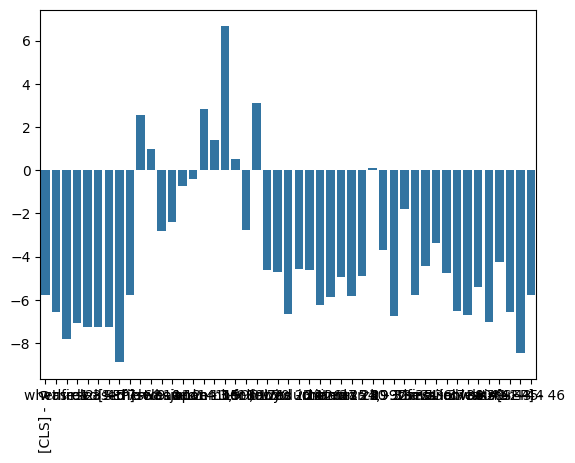

In [20]:
ax=sns.barplot(x=token_labels,y=s_scores)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,has="center")
ax.grid(True)

C:\Users\omkat\AppData\Local\Temp\ipykernel_8808\1565376063.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90,has="center")


AttributeError: Text.set() got an unexpected keyword argument 'has'

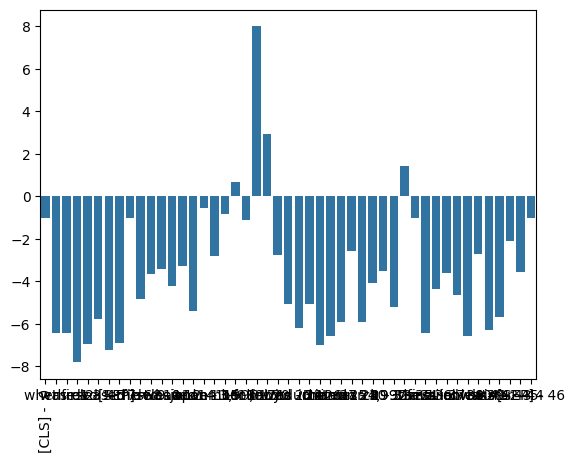

In [ ]:
ax=sns.barplot(x=token_labels,y=e_scores)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,has="center")
ax.grid(True)

Question Answering

In [17]:
sunset_motors_context="Sunset Motors is a vibrant automotive dealership that specializes in both new and used vehicles, catering to a diverse clientele. Located in  New York, it features a spacious showroom where customers can explore a wide selection of cars, trucks, and SUVs from various manufacturers. The dealership prides itself on offering exceptional customer service, with knowledgeable sales staff ready to assist buyers in finding the perfect vehicle that suits their needs and budget.In addition to vehicle sales, Sunset Motors provides comprehensive financing options, making it easier for customers to secure loans through partnerships with local banks and credit unions. The dealership also accepts trade-ins, allowing clients to conveniently upgrade their vehicles while receiving fair value for their old ones.Beyond sales, Sunset Motors boasts a state-of-the-art service department staffed by certified technicians who offer maintenance and repair services. This commitment to after-sales support ensures that customers can keep their vehicles in top condition long after the purchase. With its customer-centric approach and dedication to quality, Sunset Motors has established itself as a trusted name in the automotive industry, fostering long-term relationships with its clients."
print(sunset_motors_context)

Sunset Motors is a vibrant automotive dealership that specializes in both new and used vehicles, catering to a diverse clientele. Located in  New York, it features a spacious showroom where customers can explore a wide selection of cars, trucks, and SUVs from various manufacturers. The dealership prides itself on offering exceptional customer service, with knowledgeable sales staff ready to assist buyers in finding the perfect vehicle that suits their needs and budget.In addition to vehicle sales, Sunset Motors provides comprehensive financing options, making it easier for customers to secure loans through partnerships with local banks and credit unions. The dealership also accepts trade-ins, allowing clients to conveniently upgrade their vehicles while receiving fair value for their old ones.Beyond sales, Sunset Motors boasts a state-of-the-art service department staffed by certified technicians who offer maintenance and repair services. This commitment to after-sales support ensures 

In [42]:
def faq_bot(question):
    context = sunset_motors_context
    # Encode the input
    inputs = tokenizer.encode_plus(
        question, context, return_tensors="pt", add_special_tokens=True
    )
    input_ids = inputs["input_ids"].squeeze()  # squeeze is used to remove unnecessary dimensions in the array
    tokens = tokenizer.convert_ids_to_tokens(input_ids) 

    # Run the model
    outputs = model(**inputs)  ## **inputs is a way of unpacking a dictionary into keyword arguments
    start_logits = outputs.start_logits
    end_logits = outputs.end_logits

    # Get the most probable start and end of the answer span
    answer_start = torch.argmax(start_logits) # start_logits is a tensor of scores of likelihood of each token being the start of the answer
    answer_end = torch.argmax(end_logits) # end_logits is a tensor of scores for the likelihood of each token being the end answer

    # Validate and extract answer
    if answer_end >= answer_start:
        answer = tokens[answer_start:answer_end + 1]
    else:
        return "I don't know the answer."

    # Reconstruct answer text
    corrected_answer = ""
    for word in answer:
        if word.startswith("##"):
            corrected_answer += word[2:]
        else:
            corrected_answer += " " + word

    return corrected_answer.strip().capitalize()




In [46]:
faq_bot("Where is the dealership located?")

'New york'

In [49]:
faq_bot("How large is the dealership?")

'Sunset motors is a vibrant automotive dealership that specializes in both new and used vehicles , catering to a diverse clientele'

In [50]:
faq_bot("What type of cars are available in the dealership?")

'Cars , trucks , and suvs'